Consider the SIR model: 
dS/dt=A-βSI+γR-μS,
dI/dt=βSI-νI-μI,    (5.1)
dR/dt=νI-γR-μR.
With the following initial conditions: I(t) |_(t=0)=0.2N,R(t) |_(t=0)=0, (5.2) 
where N is the size of a population. 
Summing all the equations in (5.1) yields us a single equation for N(t):
dN/dt=A-μN                                                         (5.3)
The initial condition for (5.3) is:
N(t) |_(t=0)=N_0,                                                                          (5.4)
Where N_0 is the initial size of the population.
                   Tasks
	Find an analytical solution to model (5.3) with the initial condition (5.4). Estimate N(t) as t→∞.
	Solve model (5.1) with the initial condition (5.2) numerically. Draw the graphs for S(t), I(t) and R(t). Consider the cases when the disease-free equilibrium (DFE) is stable and unstable.
	Estimate the expected secondary infection R_0.
Note: all the model coefficients have been described in Lecture 5. Select the appropriate values for the given coefficients.  

2. Solve model (5.1) with the initial condition (5.2) numerically. Draw the graphs for
S t I t ( ), ( )
and 
R t( ). Consider the cases when the disease-free equilibrium (DFE) is stable and unstable.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Alpha = 1
Beta = 0.5
Gamma = 0.4
nu = 0.2
mu = 0.05

N_0 = 1000
I_0 = 0.2 * N_0
S_0 = N_0 - I_0
R_0 = 0
t_start=0
t_end=100
t_step=0.1
#t = np.linspace(t_start, t_end, t_step)

def sir(y, t):
    S, I, R = y
    dS_dt = Alpha - Beta * S * I + Gamma * R - mu * S
    dI_dt = Beta * S * I - nu * I - mu * I
    dR_dt = nu * I - Gamma * R - mu * R
    return [dS_dt, dI_dt, dR_dt]
t = np.arange(t_start, t_end*t_step, t_step)
y0 = [S_0, I_0, R_0]
solution = np.array([odeint(sir, y0, t)]).T
S, I, R = solution[:, 0], solution[:, 1], solution[:, 2]

plt.figure(figsize=(8, 6))
plt.plot(t, S, label='S')
plt.plot(t, I, label='I')
plt.plot(t, R, label='R')
plt.xlabel('Time')
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
np.linspace(0, 50, 100)
arr = np.array([[1, 2, 3, 4], [4, 5, 6, 9], [7, 8, 9, 5], [10, 11, 12, 55]])

print(arr[:, 3])

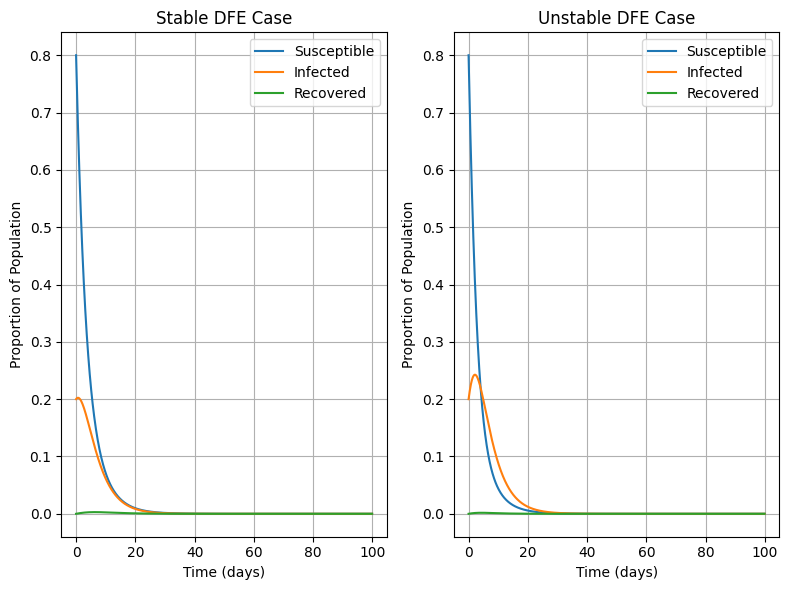

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the SIR model
def sir_model(S, I, R, beta, gamma, nu, mu, dt):
    dS_dt = -beta * S * I + gamma * R - mu * S
    dI_dt = beta * S * I - nu * I - mu * I
    dR_dt = nu * I - gamma * R 
    S_next = S + dS_dt * dt
    I_next = I + dI_dt * dt
    R_next = R + dR_dt * dt
    return S_next, I_next, R_next

# Initial conditions
N = 1  # Total population (normalized)
mu = 0.2
nu = 0.005
I0 = 0.2  # Initial infected individuals
R0 = 0  # Initial recovered individuals
S0 = N - I0 - R0  # Initial susceptible individuals

# Parameters
beta_stable = 0.3  # Infection rate for stable DFE
beta_unstable = 0.5  # Infection rate for unstable DFE
gamma_stable = 0.2
gamma_unstable = 0.6
#gamma = 0.1  # Recovery rate

# Time points (in days)
t_start = 0
t_max = 100
dt = 0.1
t = np.arange(t_start, t_max, dt)

# Arrays to store the results
S_stable = np.zeros_like(t)
I_stable = np.zeros_like(t)
R_stable = np.zeros_like(t)
S_unstable = np.zeros_like(t)
I_unstable = np.zeros_like(t)
R_unstable = np.zeros_like(t)


S_stable[0], I_stable[0], R_stable[0] = S0, I0, R0
S_unstable[0], I_unstable[0], R_unstable[0] = S0, I0, R0

for i in range(1, len(t)):
    S_stable[i], I_stable[i], R_stable[i] = sir_model(S_stable[i-1], I_stable[i-1], R_stable[i-1], beta_stable, gamma_stable, nu, mu, dt)
    S_unstable[i], I_unstable[i], R_unstable[i] = sir_model(S_unstable[i-1], I_unstable[i-1], R_unstable[i-1], beta_unstable, gamma_unstable, nu, mu, dt)

plt.figure(figsize=(8, 6))


plt.subplot(1, 2, 1)
plt.plot(t, S_stable, label='Susceptible')
plt.plot(t, I_stable, label='Infected')
plt.plot(t, R_stable, label='Recovered')
plt.title('Stable DFE Case')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.grid()
plt.legend()

# Unstable DFE case
plt.subplot(1, 2, 2)
plt.plot(t, S_unstable, label='Susceptible')
plt.plot(t, I_unstable, label='Infected')
plt.plot(t, R_unstable, label='Recovered')
plt.title('Unstable DFE Case')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the SIR model parameters
beta_stable = 0.1
A_stable = 1
nu_stable = 0.6
mu_stable = 0.4

beta_unstable = 0.3
A_unstable = 0.2
beta_unstable = 0.5
mu_unstable = 0.3
nu_unstable = 0.5
  # Infection rate for unstable DFE
# Initial conditions
N = 1.0  # Total population (normalized)
I0 = 0.2  # Initial infected individuals
R0 = 0.0  # Initial recovered individuals
S0 = N - I0 - R0  # Initial susceptible individuals

# Time parameters
t_max = 160  # Maximum time (days)
dt = 0.1  # Time step
t = np.arange(0, t_max, dt)  # Time array
R0_stable = beta_stable * A_stable / (mu_stable * (nu_stable + mu_stable))
R0_unstable = beta_unstable * A_unstable / (mu_unstable * (nu_unstable + mu_unstable))

# Initialize arrays to store the results
S_stable = np.zeros(len(t))
I_stable = np.zeros(len(t))
R_stable = np.zeros(len(t))

S_unstable = np.zeros(len(t))
I_unstable = np.zeros(len(t))
R_unstable = np.zeros(len(t))

# Set initial values
S_stable[0], I_stable[0], R_stable[0] = S0, I0, R0
S_unstable[0], I_unstable[0], R_unstable[0] = S0, I0, R0

# Euler method for stable DFE
for i in range(1, len(t)):
    S_stable[i] = S_stable[i-1] - beta_stable * S_stable[i-1] * I_stable[i-1] * dt
    I_stable[i] = I_stable[i-1] + (beta_stable * S_stable[i-1] * I_stable[i-1] - gamma_stable * I_stable[i-1]) * dt
    R_stable[i] = R_stable[i-1] + gamma_stable * I_stable[i-1] * dt

# Euler method for unstable DFE
for i in range(1, len(t)):
    S_unstable[i] = S_unstable[i-1] - beta_unstable * S_unstable[i-1] * I_unstable[i-1] * dt
    I_unstable[i] = I_unstable[i-1] + (beta_unstable * S_unstable[i-1] * I_unstable[i-1] - gamma_unstable * I_unstable[i-1]) * dt
    R_unstable[i] = R_unstable[i-1] + gamma_unstable * I_unstable[i-1] * dt

# Plot the results
plt.figure(figsize=[12, 6])

# Plot for stable DFE
plt.subplot(1, 2, 1)
plt.plot(t, S_stable, label='Susceptible')
plt.plot(t, I_stable, label='Infected')
plt.plot(t, R_stable, label='Recovered')
plt.title('SIR Model (Stable DFE)')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.legend()

# Plot for unstable DFE
plt.subplot(1, 2, 2)
plt.plot(t, S_unstable, label='Susceptible')
plt.plot(t, I_unstable, label='Infected')
plt.plot(t, R_unstable, label='Recovered')
plt.title('SIR Model (Unstable DFE)')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'gamma_stable' is not defined